In [1]:
from matplotlib import pyplot as plt

import numpy as np

import time

from IPython import display

%matplotlib inline

# 1. Heat Equation

In [2]:
Tmin = 12
Tmax = 14
Nx = 16
Ny = 16
img = (Tmax-Tmin)*np.random.rand(Nx,Ny)+Tmin

In [3]:
def _apply_boundary_conditions(img):
    img[4:8,2:4] = 30.
    #img[0:4,12:14] = 30.
    #img[10:14,2:4] = 30.
    #img[10:14,12:14] = 30.
    img[2:14,0:1] = 10.
    
    return img

def _propagate(img,dt,dx,dy,n_steps=1):
    new_img = img.copy()
    new_img[1:-1:,1:-1:] = img[1:-1:, 1:-1:] + dt*(np.diff(img, n=2, axis=0)[:,1:-1:]/(dx*dx) \
                                               + np.diff(img, n=2, axis=1)[1:-1:,:]/(dy*dy))
    new_img[0,:] = new_img[1,:]
    new_img[:,0] = new_img[:,1]
    new_img[-1,:] = new_img[-2,:]
    new_img[:,-1] = new_img[:,-2]
    return _apply_boundary_conditions(
        new_img
    )

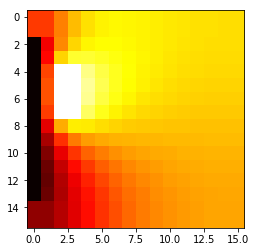

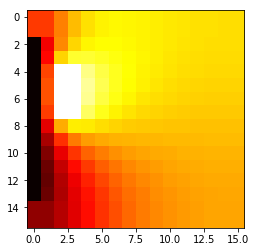

In [4]:
#plt.ion()
fig,ax = plt.subplots(1,1)
for i  in range(10000):
    img = _propagate(img,dt=0.2,dx=1.,dy=1.)
  
    if (i%1000 == 0):
        print(np.median(img))
        plt.imshow(img, cmap='hot', interpolation='nearest')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.5)


# 2. Basic Q_learning

In [40]:
Q = np.random.rand(2,2)

In [41]:
def _update_Q(Q,x,y,a,r):
    alpha = 0.1
    gamma = 0.1
    Q[x,a] = Q[x,a] + alpha*(r+gamma*np.max(Q[y,:])-Q[x,a])
    return Q

def _get_state(T,T_ideal):
    return int(T-T_ideal >0)
def _update_state(T,T_ideal,a):
    T_new = T+2*(0.5-a)*np.random.rand()
    return T_new,_get_state(T_new,T_ideal)


In [49]:
T_ideal = 23.
ACTION = ['heat up','cool down']
for j in range(5):
    T = np.random.choice([np.random.randint(8,15),np.random.randint(30,50)])
    for i in range(10000):
        x = _get_state(T,T_ideal)
        a = np.argmax(Q[x,:])
        r = -np.abs(T-T_ideal)/T_ideal
        T,y = _update_state(T,T_ideal,a)

        Q = _update_Q(Q,x,y,a,r)
        if (i % 1000 == 0):
            print(ACTION[a],T)

heat up 10.0246251681
cool down 22.3171225754
heat up 23.0851788908
cool down 23.0257813092
heat up 23.1796642557
cool down 22.3902830827
cool down 23.6261767688
heat up 22.702693015
heat up 22.7332219807
heat up 23.8563757147
heat up 10.5267583828
cool down 22.8990857571
cool down 22.7492761622
heat up 22.6510963709
heat up 23.3643031507
cool down 23.242473247
heat up 23.0298338622
heat up 22.7289204541
cool down 22.5132470735
cool down 22.9195785765
cool down 35.5442967305
cool down 23.50931886
heat up 23.3230678591
heat up 23.4386213646
heat up 23.443077489
heat up 23.2725649102
heat up 23.7505571034
heat up 22.7028879472
cool down 22.9462301947
heat up 23.5075284355
cool down 35.1004783488
cool down 22.4664717647
cool down 22.444571394
cool down 23.0617316691
cool down 22.8951526275
heat up 23.1921079118
heat up 22.9123099519
heat up 23.7562350349
cool down 22.0337414668
cool down 22.9899305976
cool down 40.86525474
cool down 23.6092790371
heat up 23.3108699883
heat up 23.429988258

In [50]:
Q[0,:],Q[1,:]

(array([ -1.30045602e-02,  -1.96260424e+02]),
 array([ -3.56757795e+02,  -1.60177569e-02]))

In [53]:
np.sign(5)

1

as it should be!